#**AdaBoost**

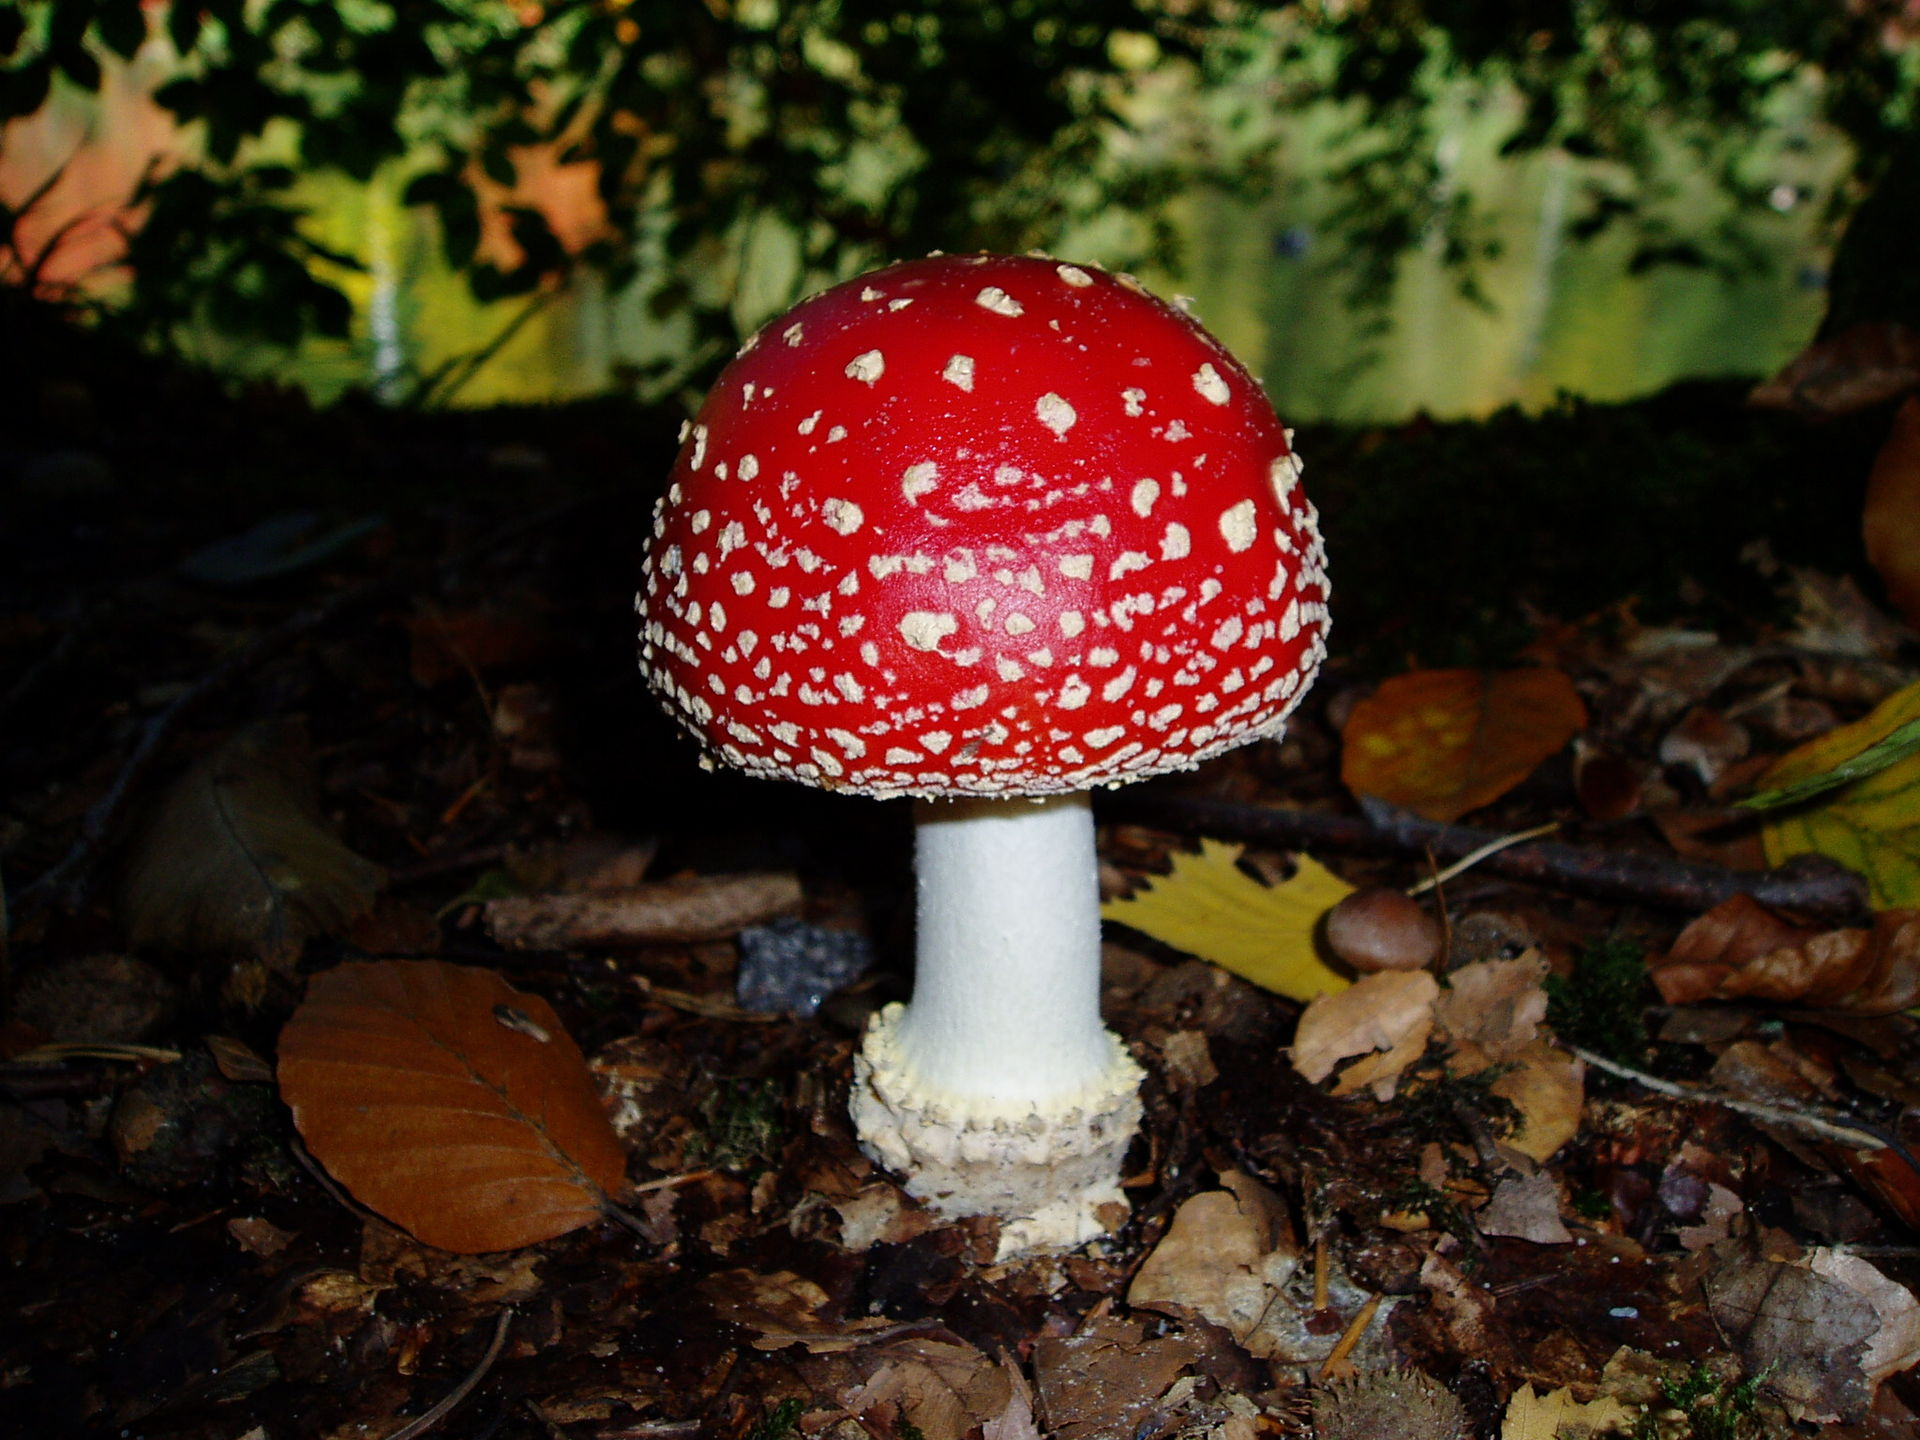

# **Mushroom Hunting: Edible or Poisonous?**

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

#**Goal**
**THIS IS IMPORTANT, THIS IS NOT OUR TYPICAL PREDICTIVE MODEL!**

Our general goal here is to see if we can harness the power of machine learning and boosting to help create not just a predictive model, but a general guideline for features people should look out for when picking mushrooms.

Because Tree based methods have great capabilities to report feature importance.

#**Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

#**EDA**
As almost every features are categorical, we can't expore numerical numbers like mean, etc. What we can explore if how often this color of mushroom shown up as Edible or Poisonous

In [20]:
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [22]:
df.duplicated().sum()

np.int64(0)

/tmp/ipython-input-4-1105578106.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df,x = df['class'].value_counts(), palette = 'Set2')


<Axes: xlabel='count', ylabel='count'>

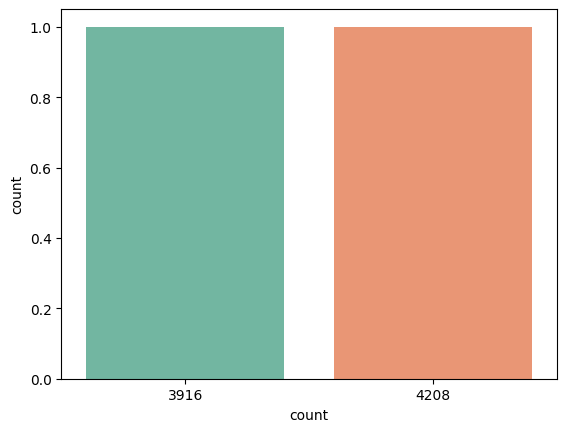

In [4]:
# check the balance of the classes
sns.countplot(data = df,x = df['class'].value_counts(), palette = 'Set2')

Seem like we have pretty balanced dataset.

In [5]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


We can see the unique numbers for each feature, top point, etc.

#**Sort values by uniqueness**

In [6]:
unique_features = df.describe().T.sort_values(by = 'unique', ascending = False)
unique_features

,count,unique,top,freq
gill-color,8124,12,b,1728
cap-color,8124,10,n,2284
spore-print-color,8124,9,w,2388
odor,8124,9,n,3528
stalk-color-below-ring,8124,9,w,4384
stalk-color-above-ring,8124,9,w,4464
habitat,8124,7,d,3148
cap-shape,8124,6,x,3656
population,8124,6,v,4040
ring-type,8124,5,p,3968


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'gill-color'),
  Text(1, 0, 'cap-color'),
  Text(2, 0, 'spore-print-color'),
  Text(3, 0, 'odor'),
  Text(4, 0, 'stalk-color-below-ring'),
  Text(5, 0, 'stalk-color-above-ring'),
  Text(6, 0, 'habitat'),
  Text(7, 0, 'cap-shape'),
  Text(8, 0, 'population'),
  Text(9, 0, 'ring-type'),
  Text(10, 0, 'stalk-root'),
  Text(11, 0, 'stalk-surface-above-ring'),
  Text(12, 0, 'stalk-surface-below-ring'),
  Text(13, 0, 'veil-color'),
  Text(14, 0, 'cap-surface'),
  Text(15, 0, 'ring-number'),
  Text(16, 0, 'stalk-shape'),
  Text(17, 0, 'gill-size'),
  Text(18, 0, 'gill-spacing'),
  Text(19, 0, 'gill-attachment'),
  Text(20, 0, 'bruises'),
  Text(21, 0, 'class'),
  Text(22, 0, 'veil-type')])

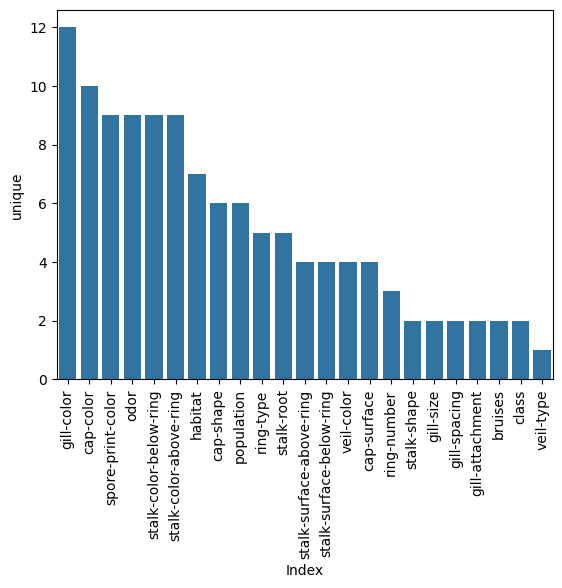

In [17]:
sns.barplot(data = unique_features, x = unique_features.index, y = 'unique')
plt.xlabel('Index')
plt.xticks(rotation = 90)

#**Categorical Encoding**

In [18]:
x = df.drop('class',axis = 1)
y = df['class']

In [23]:
x = pd.get_dummies(x,drop_first = True)

In [24]:
x.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


#**Train Test Split**

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

#**Modeling**

In [28]:
from sklearn.ensemble import AdaBoostClassifier

In below, we create a very simple Stump. Basically saying n_estimators=1, learn to split on only 1 feaure and one feature alone.

In [29]:
model = AdaBoostClassifier(n_estimators=1, learning_rate=1, random_state=42)
model.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=1, random_state=42)

# **Evaluation**

In [31]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

In [33]:
y_pred = model.predict(x_test)
y_pred

array(['e', 'p', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [35]:
print(confusion_matrix(y_test,y_pred))

[[ 994  263]
 [  39 1142]]


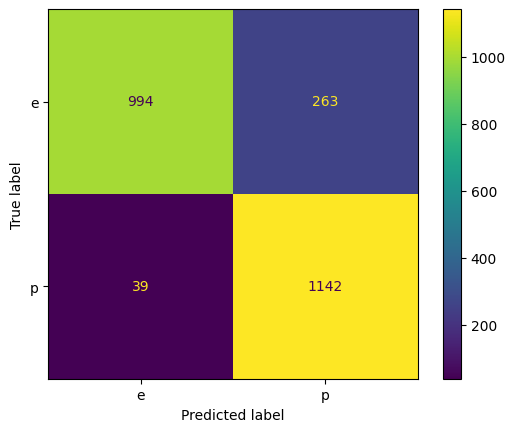

In [36]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           e       0.96      0.79      0.87      1257
           p       0.81      0.97      0.88      1181

    accuracy                           0.88      2438
   macro avg       0.89      0.88      0.88      2438
weighted avg       0.89      0.88      0.88      2438



#**Feature Importances**

In [38]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

As we can see from the feature importance, we can see one 1 value out of all.

It makes sense as our stump is techincally a single stump and it gonna say one feature is important. Because it is split on single feature.

We can figure out which feature it is by using index.

In [39]:
model.feature_importances_.argmax()

np.int64(22)

In [40]:
x.columns[22]

'odor_n'

Based on the single stump, our model think odor_n: No Odor is the most important feature and predict pretty impressive accuracy.

In [44]:
df.odor.value_counts()

,count
odor,
n,3528
f,2160
s,576
y,576
a,400
l,400
p,256
c,192
m,36


<Axes: xlabel='odor', ylabel='count'>

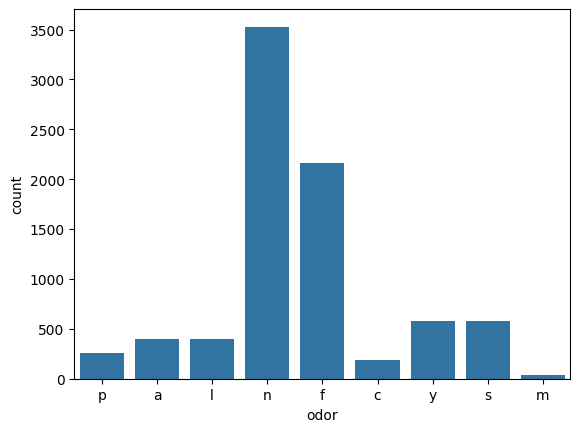

In [41]:
# # we can check the visualizaiton on across different odors mushrooms.
sns.countplot(data = df,x = df['odor'])

We can see that no odor mushroom has the highest frequency and there are various type of mushroom with other odors.

<Axes: xlabel='odor', ylabel='count'>

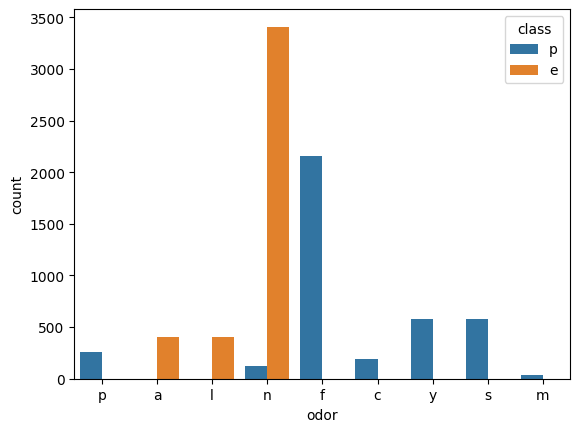

In [42]:
sns.countplot(data = df, x = 'odor',hue = 'class')

If we split by Class: Edible or Poisonous, we can see most of No Odor are Edible.

Thus, if we are setting up guidlines for people about to pick mushrooms, we can say

 * you have to check one thing: go ahead and pick the mush room and then smell it.
 * if it has no discernable odor, then most likely it's propably edible.

Of course this is not a perfect guidline. because there are quite a few poisonous mushrooms with no odor.

#**Analyzing performance as more weak learners are added (kinda Elbow method)**

There are 95 features, so we can test out stump on using different sets of using various number of features.

In [45]:
len(x.columns)

95

In [47]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

errors = []
for n in range (1,96):
  model = AdaBoostClassifier(n_estimators = n)
  model.fit(x_train,y_train)
  pred = model.predict(x_test)

  error = 1 - accuracy_score(y_test,pred)
  errors.append(error)

Text(0, 0.5, 'Test Error')

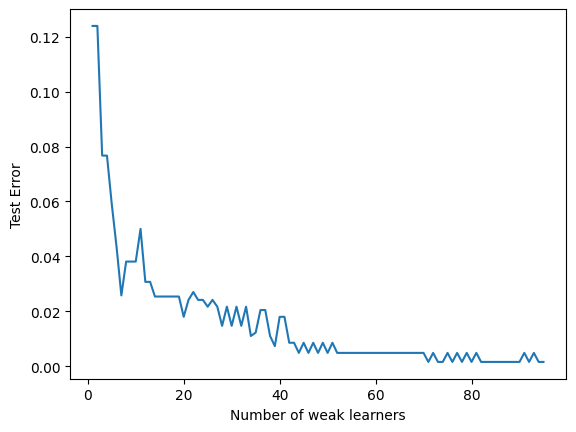

In [49]:
 plt.plot(range(1,96),errors)
 plt.xlabel('Number of weak learners')
 plt.ylabel('Test Error')

We can see that initial error rate is around 12. As we add in more stumps, error rates start to drop.

There is a little bit of spike, however it settles a while later.

We can see around 20 stumps, there is no so much improvement after that.

Also we need to take note that as we add in more stumps, previously identify n_oder will not be the most important feature because coefficient of each stumps will be constantly adjusted.

In [51]:
# check 96 n estimator of the last trained
model

AdaBoostClassifier(n_estimators=95)

In [52]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.1249792 , 0.15759831,
       0.03928409, 0.        , 0.0774982 , 0.08604398, 0.        ,
       0.        , 0.        , 0.01881757, 0.05366992, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03696406, 0.00790709, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01171655, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [54]:
features_imp = pd.DataFrame(model.feature_importances_,index = x.columns,columns = ['Importance'])
features_imp.sort_values(by = 'Importance',ascending = False)

,Importance
spore-print-color_r,0.193571
odor_f,0.157598
odor_c,0.124979
odor_p,0.086044
odor_n,0.077498
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


#**Important Featues that model is actually considering**

In [58]:
imp = features_imp[features_imp['Importance'] > 0.0].sort_values('Importance',ascending = False)
imp

,Importance
spore-print-color_r,0.193571
odor_f,0.157598
odor_c,0.124979
odor_p,0.086044
odor_n,0.077498
population_c,0.058113
gill-size_n,0.053670
odor_l,0.039284
stalk-surface-above-ring_k,0.036964
spore-print-color_u,0.034784


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'spore-print-color_r'),
  Text(1, 0, 'odor_f'),
  Text(2, 0, 'odor_c'),
  Text(3, 0, 'odor_p'),
  Text(4, 0, 'odor_n'),
  Text(5, 0, 'population_c'),
  Text(6, 0, 'gill-size_n'),
  Text(7, 0, 'odor_l'),
  Text(8, 0, 'stalk-surface-above-ring_k'),
  Text(9, 0, 'spore-print-color_u'),
  Text(10, 0, 'spore-print-color_w'),
  Text(11, 0, 'population_v'),
  Text(12, 0, 'spore-print-color_n'),
  Text(13, 0, 'gill-spacing_w'),
  Text(14, 0, 'spore-print-color_k'),
  Text(15, 0, 'stalk-color-below-ring_y'),
  Text(16, 0, 'stalk-surface-above-ring_s')])

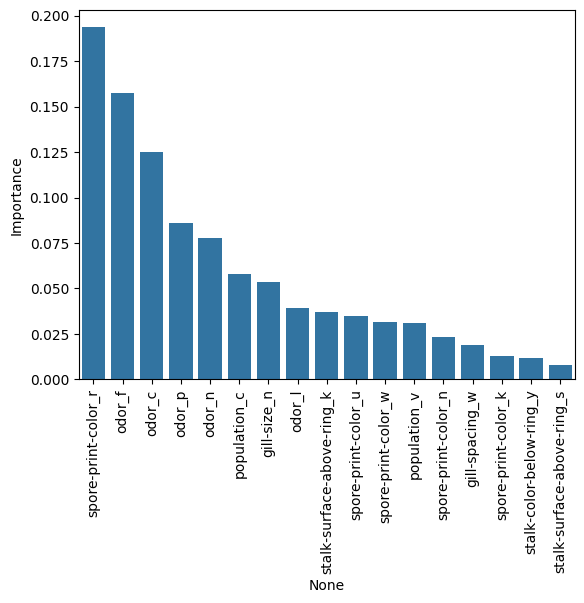

In [59]:
sns.barplot(data = imp,x = imp.index,y='Importance')
plt.xticks(rotation = 90)

<Axes: xlabel='spore-print-color', ylabel='count'>

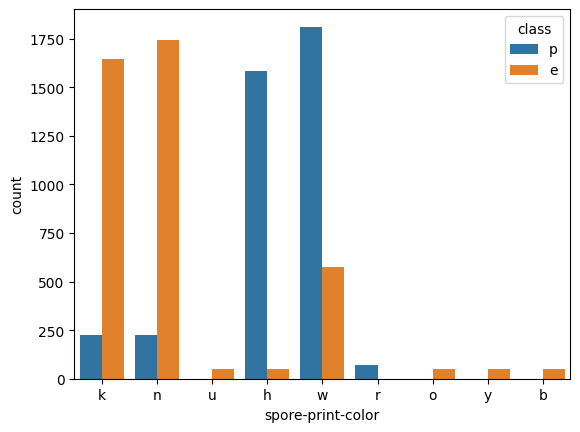

In [60]:
sns.countplot(x = 'spore-print-color',hue = 'class',data = df)

Interesting to see how the importance of the features shift as more are allowed to be added in!

But remember these are all weak learner stumps, and feature importance is available for all the tree methods!